# Flooding in Colorado - Time series

In [2]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

/Users/jerome/Documents/Code/ReadOnlyRepos/python-code/environmental_science/.venv/lib/python3.12/site-packages/earthpy/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [3]:
# download the data from https://ndownloader.figshare.com/files/16371473 using the command:
# only one time: but will be under $HOME/earth-analytics/
# data = et.data.get_data('colorado-flood')

# Set working directory + ./data to persist datasets
os.chdir(os.path.join("data"))
# data/colorado-flood/precipitation/805325-precip-daily-2003-2013.csv
file_path = os.path.join("colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")



In [10]:
# without any tranformation, read the data
boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


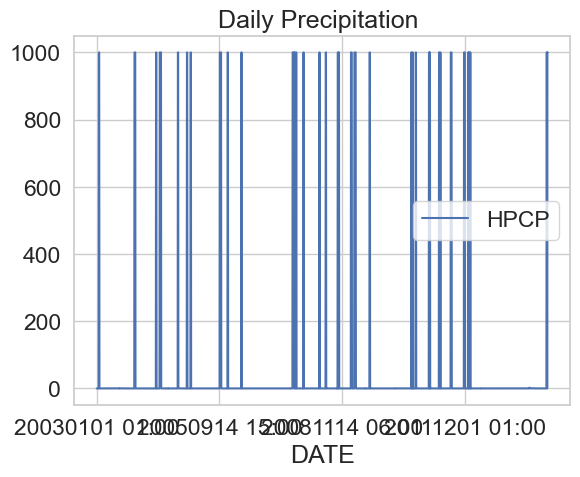

In [11]:
# And do a basic plotting
boulder_precip_2003_2013.plot(x="DATE",
                              y="HPCP",
                              title="Daily Precipitation ")
plt.show()

The N/A value of 999.99 has not been removed yet so the graph looks like vertical lines where those values exist. So we need to clean the data. Also the x axis date values in the plot look “messy” as the DATE is not interpreted as datetime.

In [14]:
# Look at the range of values in the data - specifically the HPCP column - 
# max at 999.99 is default value when there is not value
boulder_precip_2003_2013["HPCP"].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [65]:
# Import the file as a pandas dataframe, use the DATE column as index to the data
# and parse_dates parameter to specify the columns with datetime values
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       # Make sure the dates import in datetime format
                                       parse_dates=['DATE'],
                                       # Set DATE as the index so you can subset data by time period
                                       index_col=['DATE'],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values=['999.99'])
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


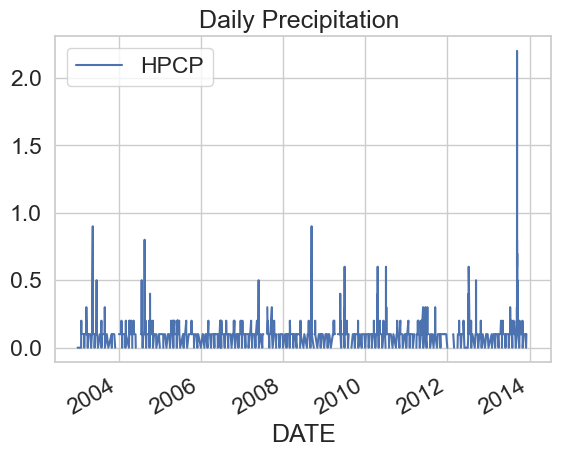

In [66]:
# Plot the data using the DAILY_PRECIP column. ndex column, then .plot() will automatically select the index column to plot on the x-axis.

boulder_precip_2003_2013.plot(
                              y="HPCP",
                              title="Daily Precipitation ")
plt.show()

In [67]:
# Look at the range of values in the data - specifically the HPCP column
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [68]:
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

In [69]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [72]:
boulder_precip_2003_2013=boulder_precip_2003_2013.reset_index()
boulder_precip_2003_2013['DATE']

0      2003-01-01 01:00:00
1      2003-02-01 01:00:00
2      2003-02-02 19:00:00
3      2003-02-02 22:00:00
4      2003-02-03 02:00:00
               ...        
1835   2013-12-22 01:00:00
1836   2013-12-23 00:00:00
1837   2013-12-23 02:00:00
1838   2013-12-29 01:00:00
1839   2013-12-31 00:00:00
Name: DATE, Length: 1840, dtype: datetime64[ns]

In [73]:
#  The .dt accessor allows you to access datetime properties like year, month, and day
precip_2005 = boulder_precip_2003_2013[boulder_precip_2003_2013['DATE'].dt.year == 2005]
precip_2005.head()

,DATE,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
367,2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
368,2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
369,2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
370,2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
371,2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [74]:
# Remove missing data values
precip_2005_clean = precip_2005.dropna()


In [77]:
precip_2005_clean=precip_2005_clean.set_index('DATE')

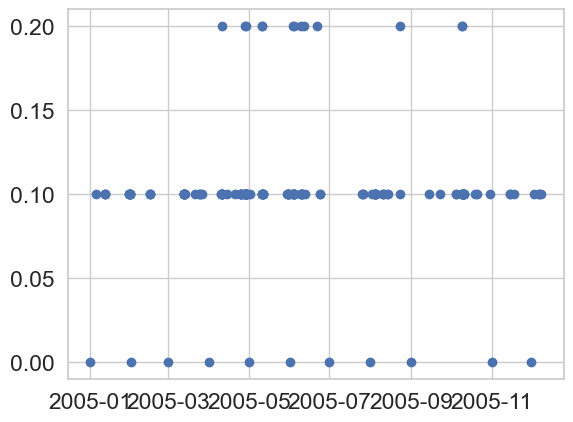

In [78]:
f, ax = plt.subplots()
ax.scatter(x=precip_2005_clean.index.values,
           y=precip_2005_clean["HPCP"])
plt.show()

Resampling time series data refers to the act of summarizing data over different time periods.

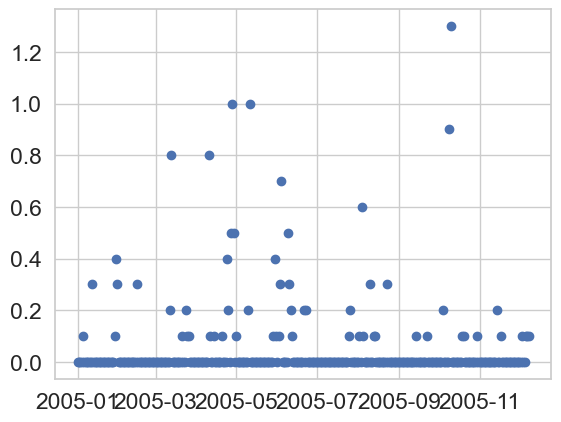

In [80]:
precip_2005_daily = precip_2005_clean.resample("D").sum()
# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_daily.index.values,
           y=precip_2005_daily["HPCP"])
plt.show()

In [88]:
# precipitation data from 2012 and a second variable that contains data from 2013.
# Illustrate another way to get the year of the DATE as an index
df_indexed=boulder_precip_2003_2013.set_index('DATE').sort_index()
precip_2012=df_indexed.loc['2012']
precip_2013=df_indexed.loc['2013']
precip_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2013-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2013-01-28 16:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-01-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2013-02-14 16:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,


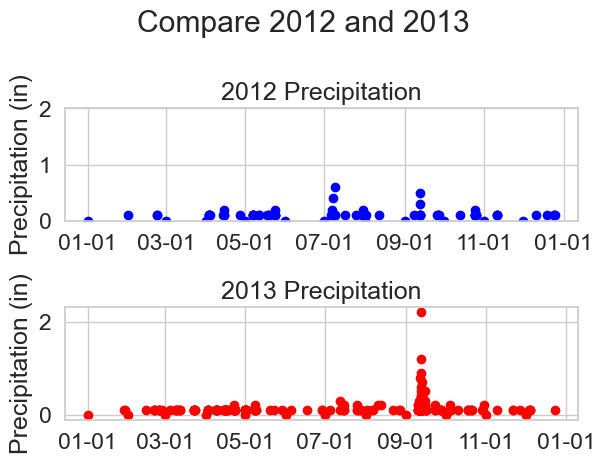

In [108]:
from matplotlib.dates import DateFormatter
f, (ax1, ax2) = plt.subplots(2,1)
date_form = DateFormatter("%m-%d")

f.suptitle("Compare 2012 and 2013")
ax1.set_title('2012 Precipitation')
ax1.scatter(x=precip_2012.index.values,
           y=precip_2012["HPCP"], color='blue')
ax1.set(ylim=[0, 2])
ax1.set_ylabel('Precipitation (in)')
ax1.xaxis.set_major_formatter(date_form)

ax2.set_title('2013 Precipitation')
ax2.set_ylabel('Precipitation (in)')
ax2.scatter(x=precip_2013.index.values,
           y=precip_2013["HPCP"], color='red')
ax2.xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.show()

In [91]:
precip_2012["HPCP"].max()

np.float64(0.6)

In [92]:
precip_2013["HPCP"].max()

np.float64(2.2)